In [20]:
import numpy as np
import pandas as pd
import regex as re
pd.set_option('display.max_rows',10)
pd.set_option('display.max_colwidth', -1)
from functools import *
from difflib import SequenceMatcher

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

### Question 1: How satisfaction of research engagement shifts over time?

**Import sample data, and select columns related to major research opportunities** 

In [64]:
data16 = pd.read_spss("SPSS/2016.sav")
data16

,ResponseID,University,StartDate,EndDate,Finished,RESIDENT,EVAL_MAJOR,COLLEGE_CODE1,COLLEGE_NAME1,MAJOR_CODE1,...,ACTCOMB,ACT,CUMGPA,CUMGPA_NATIVE,ETHNICITY_IPEDS,SOC_flag,COMBINED_EVAL_MAJOR1CIP6,COMBINED_EVAL_MAJOR1CIP6_2digit,COMBINED_EVAL_MAJOR1TEXT,UC_AAU
0,R_0001aOJpopf2tE1,UC-Irvine,,,"Clicked ""submit""",Y,Y,77,ENGINEERING,279,...,NaN,NaN,NaN,2.4,Asian,SOC,"Aerospace, Aeronautical and Astronautical Engineering",Engineering,AEROSPACE ENGINEERING,UC
1,R_000d7uwT5L31J6x,UC-Santa Cruz,,,"Clicked ""submit""",Y,N,Stev,,,...,29.0,29.0,NaN,3.2,White,non-SOC,,,,UC
2,R_000EtXHLwZQ3wR7,University of Texas at Austin,29-MAR-2016 09:40:01,29-MAR-2016 10:21:03,"Clicked ""submit""",Y,Y,2,MCCOMBS SCHL OF BUSINESS,40900,...,29.0,34.0,3.7,3.7,White,non-SOC,"Finance, General","Business, management, marketing, and related support services",FINANCE,AAU
3,R_000MJtSPRcQQZLL,UC-Irvine,,,"Clicked ""submit""",Y,Y,87,BUSINESS,141,...,NaN,NaN,NaN,3.4,Asian,SOC,"Business Administration and Management, General","Business, management, marketing, and related support services",BUSINESS ADMINISTRATION,UC
4,R_000o8hCFIeaQgip,UC-Riverside,,,"Clicked ""submit""",Y,Y,NA,Natural and Agricultural,MAT,...,NaN,NaN,NaN,3.3,Hispanic,SOC,"Mathematics, General",Mathematics and statistics,Mathematics,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101275,R_zZm5f9AbxPD0LIt,UC-Berkeley,,,"Clicked ""submit""",Y,Y,70,Haas School of Business,141,...,NaN,NaN,NaN,3.9,White,non-SOC,"Business Administration and Management, General","Business, management, marketing, and related support services",Business Administration,UC
101276,R_zZMr1cKtitDc43n,University of Virginia,24-FEB-2016 13:03:44,24-FEB-2016 13:29:26,"Clicked ""submit""",Y,Y,SEAS,Engineering Undergraduate,BIOMEDICAL,...,30.0,29.0,3.6,NaN,White,non-SOC,Biomedical/Medical Engineering,Engineering,Biomedical Engineering (BS),AAU
101277,R_zZPkpwpCcvQ32oN,UC-Santa Cruz,,,"Clicked ""submit""",Y,N,Crow,,,...,NaN,NaN,NaN,3.0,White,non-SOC,,,,UC
101278,R_zZsF4l5n9BunijD,University of Virginia,08-FEB-2016 16:22:03,28-FEB-2016 23:57:44,"Clicked ""submit""",Y,Y,SEAS,Engineering Undergraduate,CIVIL,...,NaN,NaN,3.0,NaN,African American,SOC,"Civil Engineering, General",Engineering,Civil Engineering (BS),AAU


In [71]:
data17 = pd.read_spss("SPSS/2017.sav")

In [72]:
data18 = pd.read_spss("SPSS/2018.sav")
data18

,RESPONDENTUNIQUEKEY,FINISHED,EVAL_MAJOR,MAJOR_TEXT1,MAJOR_TEXT2,MOD_ASSIGN_SERU,INTERNATIONAL,CONSENT,R1_RUCCHLLNGCLSDIS,R1_RUCCHLLNGDIFCLS,...,ETHNICITY_LOC_UCUES,ETHNICITY_UC9CAT,ETHNICITY_UC13CAT,INDEPENDENT_STUDENT_UCUES,RUCMJR1EVALOTH_UCUES,MAJOREVALUATED_UCUES,MAJOREVALUATEDCIP_UCUES,CALC_MAJORTEXT1,CALC_CIPCODE1,CALC_CIPCODE1_2digit
0,R_00001AGHNYUdSa9,1.0,Y,Biological Sciences,,,,NaN,Rarely,Rarely,...,ASIAN,ASIAN,I - KOREAN,0.0,,Biological Sciences,260101,Biological Sciences,"260101: Biology/Biological Sciences, General",26: Biological and biomedical sciences
1,R_0001X6Iy7FFu7OJ,1.0,N,Cogn Sci w/Specializ Neurosci,,,,NaN,Occasionally,Rarely,...,HISP,CHIC,D - CHICANO/CHICANA,1.0,,,,,,
2,R_000cqK7Y5QHVcwd,1.0,N,Letters & Sci Undeclared,,,,NaN,Somewhat often,Occasionally,...,ASIAN,ASIAN,K - PAK/E IND,0.0,,,,,,
3,R_000GKqxMCFxEF3n,1.0,Y,Probability & Statistics,Psychology,,,NaN,Often,Often,...,NORES,A - INTERNATIONAL,A - INTERNATIONAL,0.0,,Probability & Statistics,270599,Probability & Statistics,"270599: Statistics, Other",27: Mathematics and statistics
4,R_000GVfBfbTyw3gV,1.0,Y,ENGLISH,SPANISH,,,NaN,Often,Occasionally,...,HISP,LAT,E - LATINO/LATINA,0.0,,SPANISH,160905,SPANISH,160905: Spanish Language and Literature,"16: Foreign languages, literatures, and linguistics"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118847,R_zZLp8PxtuElfjGh,1.0,Y,CREATIVE WRITING,,,,NaN,Somewhat often,Rarely,...,HISP,CHIC,D - CHICANO/CHICANA,0.0,,CREATIVE WRITING,231302,CREATIVE WRITING,231302: Creative Writing,23: English language and literature/letters
118848,R_zZoSerhmRdRBGJb,0.0,Y,Pre-Business (Rutgers Business School),,,N,Agree,Somewhat often,Occasionally,...,,,,NaN,,,,Pre-Business (Rutgers Business School),"520201: Business Administration and Management, General","52: Business, management, marketing, and related support services"
118849,R_zZOuEOtVUr9TUPL,1.0,Y,"Criminology, Law and Society",Psychology and Social Behavior,,,NaN,Occasionally,Occasionally,...,HISP,CHIC,D - CHICANO/CHICANA,0.0,,"Criminology, Law and Society",450401,"Criminology, Law and Society",450401: Criminology,45: Social sciences
118850,R_zZp4DtWopz6kLsZ,1.0,Y,Mechanical Engineering - 5 Year Program (School of Engineering),,,N,Agree,Somewhat often,Somewhat often,...,,,,NaN,,,,Mechanical Engineering - 5 Year Program (School of Engineering),141901: Mechanical Engineering,14: Engineering


In [74]:
data19 = pd.read_spss("SPSS/2019.sav")
data19

,respKey,InstrKey,StChDate,LastSUbmTime,CaseStatus,LastPage,RESIDENT,EVAL_MAJOR_1,MAJOR_TEXT1,MAJOR_CODE1,...,ACTS,ACT_COMPOSITE,CUMGPA,CUMGPA_NATIVE,EXCLUDE,CALC_EVAL_MAJOR1TEXT,CALC_EVAL_MAJORCIP6,R19_RUCMJR1EVAL_2,R20_RUCMJR1EVALOTH_2,CALC_CIPCODE1_2digit
0,000441F5-5444-40E7-B19C-3368C4251556,Rutgers,04/05/2019,2019-04-05 08:47:53.857,Completed survey,preSubmit,No,No,Unspecified Curriculum (A&S) (School of Arts and Sciences),001,...,NaN,NaN,2.688,NaN,N,,,NaN,-5,
1,0018B799-10DB-4ED2-8CF7-C023014595C2,Texas A&M,04/19/2019,2019-04-19 20:51:04.920,Completed survey,FinalComment,Yes,Yes,ENGINEERING - LOWER,ENGE,...,34.0,30.00,3.071,NaN,N,ENGINEERING - LOWER,"140101: Engineering, General",Evaluated first major provided in seed file,-5,14: Engineering
2,001C80FE-3487-4B76-8E8D-50DF952387FE,Rutgers,04/19/2019,2019-04-19 09:50:58.757,Completed survey,preSubmit,Yes,Yes,Pre-Business (School of Arts and Sciences),006,...,NaN,NaN,3.038,NaN,N,Urban Planning and Design,"040301: City/Urban, Community and Regional Planning",Evaluated a major other than one provided in seed file,971,04: Architecture and related services
3,001DBBBF-8A49-4321-B6FA-7C8627B135FB,University of North Carolina Chapel Hill,05/19/2019,2019-05-19 13:46:20.417,Completed survey,FinalComment,Yes,No,Undeclared,,...,23.0,25.25,3.500,3.5,N,,,NaN,-5,
4,00270F3B-A77F-4F5A-8C60-B348379B5317,Texas A&M,03/25/2019,2019-03-25 18:32:39.640,Partially completed survey,Page02,Yes,Yes,BUSINESS ADMINISTRATION,BUAD,...,0.0,NaN,3.692,NaN,N,BUSINESS ADMINISTRATION,"520201: Business Administration and Management, General",partial breakoff,-2,"52: Business, management, marketing, and related support services"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28338,B4DC8C55-AEA9-4907-8203-9DD471AB7665,Texas A&M,03/25/2019,2019-03-25 06:41:46.747,Completed survey,FinalComment,Yes,Yes,CONSTRUCTION SCIENCE - LOWER,COSL,...,0.0,NaN,0.000,NaN,N,CONSTRUCTION SCIENCE - LOWER,151001: Construction Engineering Technology/Technician,Evaluated first major provided in seed file,-5,15: Engineering technologies/technicians
28339,CBDEF494-9F11-41A8-A019-663E354DF1F5,Texas A&M,04/11/2019,2019-04-11 18:39:46.570,Partially completed survey,Page05,Yes,Yes,NURSING,NURS,...,0.0,NaN,0.000,NaN,N,NURSING,513801: Registered Nursing/Registered Nurse,partial breakoff,-2,51: Health professions and related clinical sciences
28340,DEF300F0-3855-4319-84D8-E9E82B97E951,Texas A&M,04/05/2019,2019-04-05 12:35:04.127,Partially completed survey,Page22_eval,Yes,Yes,NURSING,NURS,...,0.0,NaN,3.119,NaN,N,NURSING,513801: Registered Nursing/Registered Nurse,Evaluated first major provided in seed file,-5,51: Health professions and related clinical sciences
28341,E1DAE330-6F69-45B8-BB46-E0F64F1BC01F,Texas A&M,03/25/2019,2019-03-25 15:22:54.447,Completed survey,FinalComment,Yes,Yes,ECOLOGICAL RESTORATION,ECOR,...,0.0,NaN,3.666,NaN,N,ECOLOGICAL RESTORATION,261305: Environmental Biology,Evaluated first major provided in seed file,-5,26: Biological and biomedical sciences


In [75]:
data20 = pd.read_spss("SPSS/2020.sav")
data20

,DATE_STARTED,COMPLETEDDATE,Duration_in_seconds,FINISHED,RESPONDENTUNIQUEKEY,RUCCHLLNGCLSDIS,RUCCHLLNGDIFCLS,RUCCHLLNGASKIN,RUCCHLLNGINTRST,RUCFCLTYDISCEXT2016,...,DUCCLIMAFFORD,Research_University,COPY_RUC1MJREV,COPY_RUCMJREVOT,CALC_EVAL_MAJOR1TEXT,CALC_EVAL_MAJORCIP6,CALC_CIPCODE1_2digit,CALC_Level,CALC_ETHNICITY,CALC_RUCRELIGIO
0,2020-04-28 08:51:36,2020-04-28 09:32:59,2482.0,True,R_000KyOLTNEV7lsZ,Often,Somewhat often,Somewhat often,Often,Somewhat often,...,NaN,UC-Irvine,Evaluated first major provided in seed file,NaN,Biological Sciences,"26.0101 Biology/Biological Sciences, General.",26 BIOLOGICAL AND BIOMEDICAL SCIENCES.,Sophomore,White,Non‐denominational Evangelical
1,2020-05-06 11:06:14,2020-05-06 12:00:46,3271.0,True,R_006G7Gs1szkXHC9,Occasionally,Rarely,Somewhat often,Occasionally,Occasionally,...,NaN,UC-Santa Cruz,NaN,NaN,,,,Junior,Hispanic,Roman Catholic
2,2020-05-05 10:00:09,2020-06-28 20:42:24,4704135.0,False,R_007sClWZs9BZSfL,Rarely,Never,Never,Never,Never,...,NaN,UC-Santa Cruz,Evaluated first major provided in seed file,NaN,Psychology BA,30.1701 Behavioral Sciences.,30 MULTI/INTERDISCIPLINARY STUDIES.,Senior,White,NaN
3,2020-06-09 09:34:40,2020-08-03 08:23:47,4747747.0,False,R_00aqDpRoOsT5IuR,Occasionally,Occasionally,Occasionally,Rarely,Occasionally,...,NaN,UC-Santa Barbara,Evaluated first major provided in seed file,NaN,Pre-Financial Mathematics and Statistics,"27.0399 Applied Mathematics, Other.",27 MATHEMATICS AND STATISTICS.,Sophomore,Nonresident alien,NaN
4,2020-04-14 09:17:43,2020-04-14 10:16:00,3497.0,False,R_00aUQomTdztNM09,Somewhat often,Occasionally,Often,Occasionally,Occasionally,...,NaN,UC-Berkeley,Evaluated first major provided in seed file,NaN,Nut Sci-Physio & Metabol,30.1901 Nutrition Sciences.,30 MULTI/INTERDISCIPLINARY STUDIES.,Senior,Hispanic,Christian Church (Disciples of Christ)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83471,2020-05-05 14:43:19,2020-05-05 15:25:43,2543.0,True,R_zZSx9mcNuFrjkBP,Rarely,Occasionally,Rarely,Never,Never,...,NaN,UC-Santa Barbara,Evaluated first major provided in seed file,NaN,Pre-Biology,"26.0101 Biology/Biological Sciences, General.",26 BIOLOGICAL AND BIOMEDICAL SCIENCES.,Sophomore,Asian,Christian Church (Disciples of Christ)
83472,2020-04-14 15:01:17,2020-04-14 15:23:44,1347.0,True,R_zZtDsm6VIorNrdT,Often,Rarely,Somewhat often,Somewhat often,Rarely,...,NaN,UC-Berkeley,Evaluated first major provided in seed file,NaN,MCB-Cell & Dev Biology,26.0406 Cell/Cellular and Molecular Biology.,26 BIOLOGICAL AND BIOMEDICAL SCIENCES.,Senior,Asian,Spiritual but not associated with a major religion
83473,2020-04-23 10:20:49,2020-04-24 00:21:30,50441.0,True,R_zZtjAfNE33WXhND,Often,Often,Somewhat often,Occasionally,Occasionally,...,NaN,UC-Santa Barbara,Evaluated first major provided in seed file,NaN,Film and Media Studies,50.0601 Film/Cinema/Media Studies.,50 VISUAL AND PERFORMING ARTS.,Senior,Hispanic,Spiritual but not associated with a major religion
83474,2020-06-09 09:58:30,2020-06-09 10:28:19,1788.0,True,R_zZtQcqcm0Gn8h9f,Occasionally,Occasionally,Rarely,Occasionally,Rarely,...,NaN,UC-Santa Barbara,Evaluated first major provided in seed file,NaN,Psychological & Brain Sciences,42.2704 Experimental Psychology.,42 PSYCHOLOGY.,Senior,Asian,Spiritual but not associated with a major religion


In [76]:
data21 = pd.read_spss("SPSS/2021.sav")
data21

,RESPONDENTUNIQUEKEY,UNIVERSITY_CODE,DATE_STARTED,COMPLETED_DATE,PROGRESS,DURATION,FINISHED,RECORDEDDATE,BROWSER1,VERSION1,...,CIP_CODE2,RUCMAJOR1CIP6,CALC_CIPCODE1,CALC_CIPCODE2,CIP1Title6Digits,CALC_CIPCODE1_4DIGIT,CIP1Title4Digits,CALC_CIPCODE1_2DIGIT,CIP1Title2Digits,CIP_CODE2010
0,R_2rZQr2Bh5FjuGPf,DB,2021-03-26 11:08:57,2021-05-24 10:12:53,12.0,5094235.0,False,2021-06-07 10:36:43,Safari,14.0.2,...,,,,,,,,,,400699
1,R_2rr6aKIBdFsvBeB,DB,2021-03-08 14:47:17,2021-03-08 15:20:05,100.0,1967.0,True,2021-03-08 14:20:06,Safari,14.0.3,...,,,050201,,African-American/Black Studies.,0502,"Ethnic, Cultural Minority, Gender, and Group Studies.",05,"AREA, ETHNIC, CULTURAL, GENDER, AND GROUP STUDIES.",050201
2,R_3kFKUCAu3OtEQ4p,DB,2021-03-17 20:06:49,2021-03-17 20:31:01,100.0,1452.0,True,2021-03-17 19:31:02,Chrome,89.0.4389.82,...,231303,,050207,231303,Women's Studies.,0502,"Ethnic, Cultural Minority, Gender, and Group Studies.",05,"AREA, ETHNIC, CULTURAL, GENDER, AND GROUP STUDIES.",050207
3,R_2a8oDnewcbEWewJ,DB,2021-04-23 12:44:38,2021-04-23 13:05:50,100.0,1271.0,True,2021-04-23 12:05:51,Chrome,89.0.4389.128,...,,,050207,,Women's Studies.,0502,"Ethnic, Cultural Minority, Gender, and Group Studies.",05,"AREA, ETHNIC, CULTURAL, GENDER, AND GROUP STUDIES.",050207
4,R_2uCCORBydUuh6Nt,DB,2021-05-29 12:10:00,2021-06-01 21:05:55,100.0,291355.0,True,2021-06-01 20:05:55,Chrome,90.0.4430.212,...,,,110401,,Information Science/Studies.,1104,Information Science/Studies.,11,COMPUTER AND INFORMATION SCIENCES AND SUPPORT SERVICES.,110401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49001,R_w65gxHZuUITJ2g1,YT,2021-02-23 13:40:57,2021-02-23 13:42:23,7.0,85.0,False,2021-04-14 16:38:21,Chrome,87.0.4280.88,...,,,960000,,Undeclared,9600,Undeclared,96,Undeclared,
49002,R_6Yg4mRrLrLQuElb,YT,2021-03-09 12:40:33,2021-03-09 20:53:05,100.0,29551.0,True,2021-03-09 19:53:05,Safari,14.0.2,...,,,960000,,Undeclared,9600,Undeclared,96,Undeclared,
49003,R_2rq39C9ywuhjXES,YT,2021-02-24 13:33:02,2021-02-24 13:59:57,100.0,1614.0,True,2021-02-24 12:59:57,Safari,11.1.2,...,,,960000,,Undeclared,9600,Undeclared,96,Undeclared,
49004,R_XZf8DEj5H1uOfnP,YT,2021-03-16 09:23:44,2021-03-16 09:35:19,100.0,695.0,True,2021-03-16 08:35:20,Chrome,88.0.4324.192,...,,,960000,,Undeclared,9600,Undeclared,96,Undeclared,


In [108]:
mjrresopp16 = data16[["RUC1MJRRESOPP", 'RUCCMPLTDRES2014', 'RUCRES199', 'RUCRESFAC2016', 'RUCCREATACT2016','RUCCREATFAC2016',
                      'RUCCREATFAC2016']]
mjrresopp17 = data17[["R29_RURESOPP", 'R11_RUCCMPLTDRES', 'R11_RUCRES199', 'R11_RUCRESFAC', 'R11_RUCCREATACT', 'R11_RUCCREATFAC']]
mjrresopp18 = data18[["R29_RURESOPP", 'R11_RUCCMPLTDRES', 'R11_RUCRES199', 'R11_RUCRESFAC', 'R11_RUCCREATACT', 'R11_RUCCREATFAC',
                       'R11_RUCSOLOFACSUP', 'R11_RUCSOLONOFAC']]
mjrresopp19 = data19[["R29_RURESOPP", 'R11_RUCCMPLTDRES', 'R11_RUCRES199', 'R11_RUCRESFAC', 'R11_RUCCREATACT', 'R11_RUCCREATFAC', "R11_7",
                       "R11_8"]]
mjrresopp20 = data20[["RUC1MJRRESOPP", "RUCCMPLTDRES2014", "RUCRES199", "RUCRESFAC2016", "RUCCREATACT2016", "RUCCREATFAC2016",
                       "RUCSOLOFACSUP", "RUCSOLONOFAC"]]
mjrresopp21 = data21[["RUC1MJRRESOPP", "RUCCMPLTDRES2014", "RUCRES199", "RUCRESFAC2016", "RUCCREATACT2016", "RUCCREATFAC2016", "RUCRESUNDFAL2018",
                      "RUCRESWIHFAL2018"]]

**Convert text answers to numeric scale of 1-6**

In [109]:
# dictionary - convert text to scale
satisfaction6_dict = {'Very dissatisfied': 1, 'Dissatisfied': 2, 'Somewhat dissatisfied': 3, 
                      'Somewhat satisfied': 4, 'Satisfied': 5, 'Very satisfied': 6}

In [110]:
# find satisfication score in each year, adjust dictionary accordingly
mjrresopp16["RUC1MJRRESOPP"] = mjrresopp16["RUC1MJRRESOPP"].replace({'Very dissatisfied': 1, 'Dissatisfied': 2, 'Somewhat dissatisfied': 3, 
                      'Somewhat satisfied': 4, 'Satisfied': 5, 'Very satisfied': 6, " ": None})
mjrresopp16["RUC1MJRRESOPP"].unique()

array([ 4.,  3., nan,  5.,  2.,  6.,  1.])

In [111]:
mjrresopp17["R29_RURESOPP"] = mjrresopp17["R29_RURESOPP"].replace({'Very dissatisfied': 1, '  Dissatisfied': 2, '  Somewhat dissatisfied': 3, 
                      '  Somewhat satisfied': 4, '  Satisfied': 5, '  Very satisfied': 6, '#NULL!': None})
mjrresopp17["R29_RURESOPP"].unique()

array([ 4.,  3.,  6.,  5.,  1., nan,  2.])

In [112]:
mjrresopp18["R29_RURESOPP"]  = mjrresopp18["R29_RURESOPP"].replace({'Very dissatisfied': 1, '  Dissatisfied': 2, '  Somewhat dissatisfied': 3, 
                      '  Somewhat satisfied': 4, '  Satisfied': 5, '  Very satisfied': 6, " ": None})
mjrresopp18["R29_RURESOPP"].unique()

array([ 4.,  1.,  5.,  3., nan,  2.,  6.])

In [113]:
mjrresopp19["R29_RURESOPP"] = mjrresopp19["R29_RURESOPP"].replace({'Very dissatisfied': 1, 'Dissatisfied': 2, 'Somewhat dissatisfied': 3, 
                      'Somewhat satisfied': 4, 'Satisfied': 5, 'Very satisfied': 6, 'No answer': None, "Partial breakoff": None})
mjrresopp19["R29_RURESOPP"].unique()

array([ 5., nan,  4.,  6.,  3.,  2.,  1.])

In [115]:
mjrresopp20["RUC1MJRRESOPP"] = mjrresopp20["RUC1MJRRESOPP"].replace({'Very dissatisfied': 1, '  Dissatisfied': 2, '  Somewhat dissatisfied': 3, 
                      '  Somewhat satisfied': 4, '  Satisfied': 5, '  Very satisfied': 6, '#NULL!': None, "-1": None})
mjrresopp20["RUC1MJRRESOPP"].unique()

array([ 4.,  2., nan,  3.,  5.,  6.,  1.])

In [116]:
mjrresopp21["RUC1MJRRESOPP"] = mjrresopp21["RUC1MJRRESOPP"].replace({'Very dissatisfied': 1, 'Dissatisfied': 2, 'Somewhat dissatisfied': 3, 
                      'Somewhat satisfied': 4, 'Satisfied': 5, 'Very satisfied': 6, '#NULL!': None, "-1": None, 'Not applicable':None})
mjrresopp21["RUC1MJRRESOPP"].unique()

array([nan,  6.,  2.,  3.,  4.,  5.,  1.])

In [117]:
# overall satisfaction score
mrresopp_pct = [np.mean(mjrresopp16.iloc[:, 0]),np.mean(mjrresopp17.iloc[:, 0]),np.mean(mjrresopp18.iloc[:, 0]),
                np.mean(mjrresopp19.iloc[:, 0]),np.mean(mjrresopp20.iloc[:, 0]),np.mean(mjrresopp21.iloc[:, 0])]
mrresopp_pct

[4.116067576089482,
 4.286119496727921,
 4.161213058124111,
 4.191853887182803,
 4.047506756398707,
 4.292161269001983]

**Select answers only with past experience of research (1 or more positive answers in research experience related questions)**

In [118]:
mjrresopp16_with_experience = mjrresopp16.loc[(mjrresopp16['RUCCMPLTDRES2014'] == "Yes, doing now or have done")|(mjrresopp16['RUCRES199'] == "Yes, doing now or have done")|(
    mjrresopp16['RUCRESFAC2016'] == "Yes, doing now or have done")|(mjrresopp16['RUCCREATACT2016'] == "Yes, doing now or have done")|(
        mjrresopp16['RUCCREATFAC2016'].iloc[:, 0] == "Yes, doing now or have done")]
        # replicate label "RUCCREATFAC2016"

In [119]:
mjrresopp17_with_experience = mjrresopp17.loc[(mjrresopp17['R11_RUCCMPLTDRES'] == "Yes, doing now or have done")|(mjrresopp17['R11_RUCRES199'] == "Yes, doing now or have done")|(
    mjrresopp17['R11_RUCRESFAC'] == "Yes, doing now or have done")|(mjrresopp17['R11_RUCCREATACT'] == "Yes, doing now or have done")|(
        mjrresopp17['R11_RUCCREATFAC'] == "Yes, doing now or have done")]

In [120]:
mjrresopp18_with_experience = mjrresopp18.loc[(mjrresopp18['R11_RUCCMPLTDRES'] == "Yes, doing now or have done")|(mjrresopp18['R11_RUCRES199'] == "Yes, doing now or have done")|(
    mjrresopp18['R11_RUCRESFAC'] == "Yes, doing now or have done")|(mjrresopp18['R11_RUCCREATACT'] == "Yes, doing now or have done")|(
        mjrresopp18['R11_RUCCREATFAC'] == "Yes, doing now or have done")|(
        mjrresopp18['R11_RUCSOLOFACSUP'] == "Yes, doing now or have done")|(
        mjrresopp18['R11_RUCSOLONOFAC'] == "Yes, doing now or have done")]

In [121]:
mjrresopp19_with_experience = mjrresopp19.loc[(mjrresopp19['R11_RUCCMPLTDRES'] == "Yes, doing now or have done")|(mjrresopp19['R11_RUCRES199'] == "Yes, doing now or have done")|(
    mjrresopp19['R11_RUCRESFAC'] == "Yes, doing now or have done")|(mjrresopp19['R11_RUCCREATACT'] == "Yes, doing now or have done")|(
        mjrresopp19['R11_RUCCREATFAC'] == "Yes, doing now or have done")|(
        mjrresopp19['R11_7'] == "Yes, doing now or have done")|(
        mjrresopp19['R11_8'] == "Yes, doing now or have done")]

In [122]:
mjrresopp20_with_experience = mjrresopp20.loc[(mjrresopp20['RUCCMPLTDRES2014'] == "Yes, doing now or have done")|(mjrresopp20['RUCRES199'] == "Yes, doing now or have done")|(
    mjrresopp20['RUCRESFAC2016'] == "Yes, doing now or have done")|(mjrresopp20['RUCCREATACT2016'] == "Yes, doing now or have done")|(
        mjrresopp20['RUCCREATFAC2016'] == "Yes, doing now or have done")|(
        mjrresopp20['RUCSOLOFACSUP'] == "Yes, doing now or have done")|(
        mjrresopp20['RUCSOLONOFAC'] == "Yes, doing now or have done")]

In [123]:
mjrresopp21_with_experience = mjrresopp21.loc[(mjrresopp21['RUCCMPLTDRES2014'] == "Yes, doing now or have done")|(mjrresopp21['RUCRES199'] == "Yes, doing now or have done")|(
    mjrresopp21['RUCRESFAC2016'] == "Yes, doing now or have done")|(mjrresopp21['RUCCREATACT2016'] == "Yes, doing now or have done")|(
        mjrresopp21['RUCCREATFAC2016'] == "Yes, doing now or have done")|(
        mjrresopp21['RUCRESUNDFAL2018'] == "Yes, doing now or have done")|(
        mjrresopp21['RUCRESWIHFAL2018'] == "Yes, doing now or have done")]

In [124]:
# with research experience: satisfaction score
mrresopp_pct_with_experience = [np.mean(mjrresopp16_with_experience.iloc[:, 0]),np.mean(mjrresopp17_with_experience.iloc[:, 0]),np.mean(mjrresopp18_with_experience.iloc[:, 0]),
                np.mean(mjrresopp19_with_experience.iloc[:, 0]),np.mean(mjrresopp20_with_experience.iloc[:, 0]),np.mean(mjrresopp21_with_experience.iloc[:, 0])]
mrresopp_pct_with_experience

[4.185793957737795,
 4.343686074938882,
 4.220811062619526,
 4.2361746101334,
 4.11476548310125,
 4.370681161882113]

In [125]:
years = ['2016', '2017', '2018', '2019', '2020', '2021']

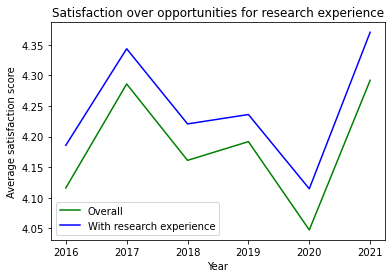

In [126]:
plt.plot(years, mrresopp_pct, color = "green")
plt.plot(years, mrresopp_pct_with_experience, color = "blue")
plt.title("Satisfaction over opportunities for research experience")
plt.xlabel("Year")
plt.ylabel("Average satisfaction score")
plt.legend(["Overall", "With research experience"],loc = 0);